<a href="https://colab.research.google.com/github/Rushabhtikale92/Online-Retail-Customer-Segmentation/blob/main/Copy_of_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import warnings
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/CSV/Online Retail.xlsx - Online Retail.csv')

# **Sample Data**

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


# **Checking the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# **Droping Null Value**

In [5]:
# Droping null values from the dataset
data.dropna(inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
data.shape 

(406829, 8)

**The 'InvoiceNo' feature is contain the data starting with C that indicates a cancellation of transaction. So we just to remove that feature. **

In [6]:
data = data[~data['InvoiceNo'].str.contains('C')]

In [ ]:
data.shape 

(397924, 8)

In [ ]:
Description_data = data['Description'].value_counts().reset_index()
Description_data.rename(columns = {'index' : 'Description Name'}, inplace = True)
Description_data.rename(columns = {'Description' : 'Count'}, inplace = True)
Description_data.head()

,Description Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [ ]:
Description_data.tail()

,Description Name,Count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


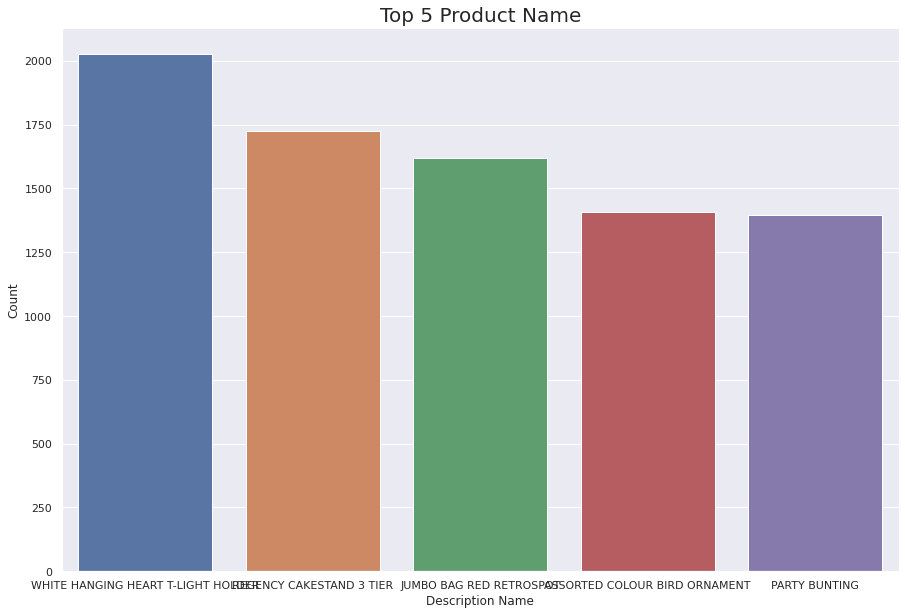

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Top 5 Product Name',fontsize=20)
sns.barplot(x='Description Name',y='Count',data=Description_data[:5])

From the above graph we can conclude that this product are among top five selled and most of the customer are purchasing this product, so this is well high in demand.

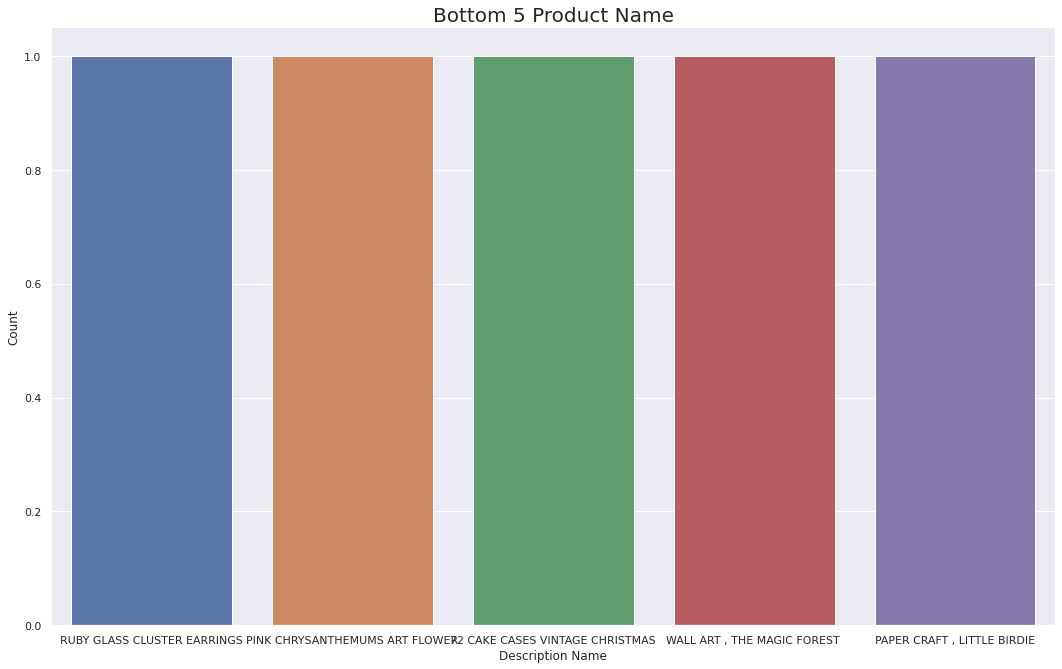

In [ ]:
plt.figure(figsize=(18,11))
plt.title('Bottom 5 Product Name',fontsize=20)
sns.barplot(x='Description Name',y='Count',data=Description_data[-5:])

From the above graph we can conclude that this product are among bottom five selled and most of the customer are avoiding this product, so this is well not in high demand.

In [ ]:
StockCode_data = data['StockCode'].value_counts().reset_index()
StockCode_data.rename(columns = {'index' : 'StockCode_Name'}, inplace = True)
StockCode_data.rename(columns = {'StockCode' : 'Count'}, inplace = True)
StockCode_data.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


In [ ]:
StockCode_data.tail()

,StockCode_Name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


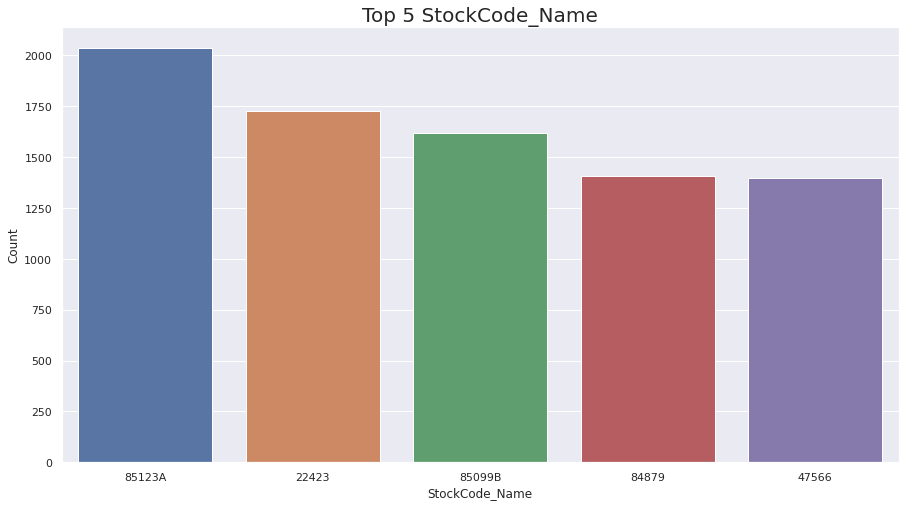

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Top 5 StockCode_Name',fontsize=20)
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_data[:5])

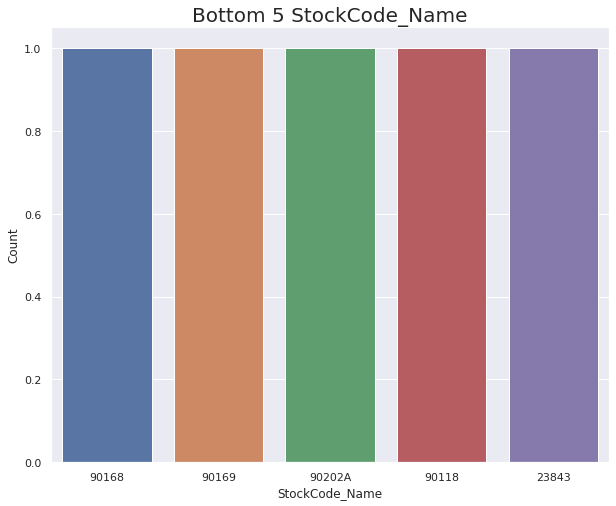

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Bottom 5 StockCode_Name',fontsize=20)
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_data[-5:])

# **Country Analysis**

In [ ]:
Country_data = data['Country'].value_counts().reset_index()
Country_data.rename(columns = {'index' : 'Country_Name'}, inplace = True)
Country_data.rename(columns = {'Country' : 'Count'}, inplace = True)
Country_data.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


In [ ]:
Country_data.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


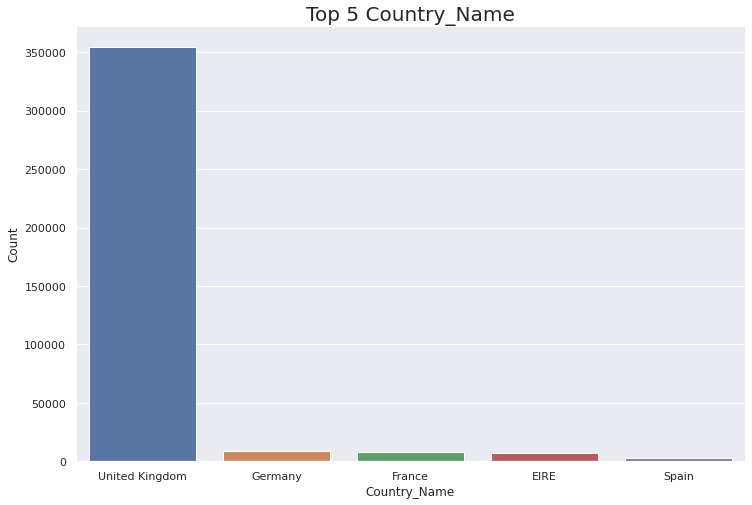

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Top 5 Country_Name',fontsize=20)
sns.barplot(x='Country_Name',y='Count',data=Country_data[:5])

From the above graph we can easily say that country like united kingdom is have higher transaction as compared to other countries, it means that the united kingdom have higher purchasing chance as compared to Germany, France, EIRE and Spain.

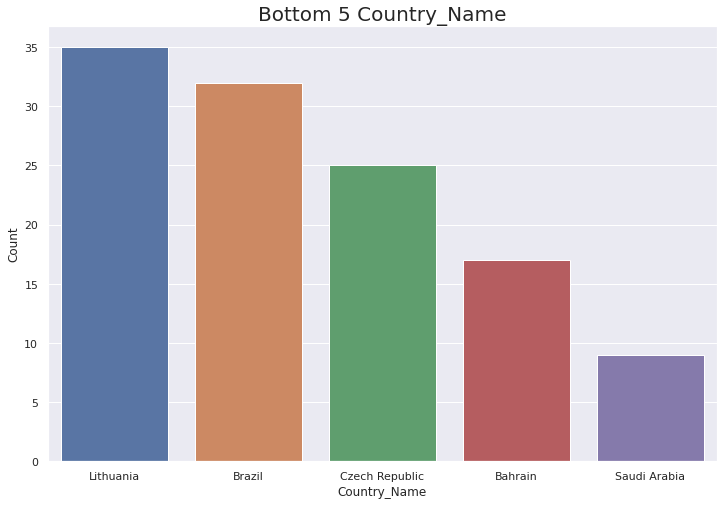

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Bottom 5 Country_Name',fontsize=20)
sns.barplot(x='Country_Name',y='Count',data=Country_data[-5:])

The Saudi Arabia has the lowest purchasing history, so we don't will focus more on this five country for analyse the customer.

# **Feature Engineering**

In [7]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], infer_datetime_format=True)

In [8]:
data['year'] = data['InvoiceDate'].dt.year
data['month'] = data['InvoiceDate'].dt.month
data['month name'] = data['InvoiceDate'].dt.month_name()
data['day'] = data['InvoiceDate'].dt.day
data['day name'] = data['InvoiceDate'].dt.day_name()
data['Hour'] = data['InvoiceDate'].dt.hour
data['Minute'] = data['InvoiceDate'].dt.minute

In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,month name,day,day name,Hour,Minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,December,1,Wednesday,8,26


# **Transaction Per Day**

In [10]:
day = data['day name'].value_counts().reset_index()
day.rename(columns = {'index' : 'Day'}, inplace = True)
day.rename(columns = {'day name' : 'Count'}, inplace = True)
day

,Day,Count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


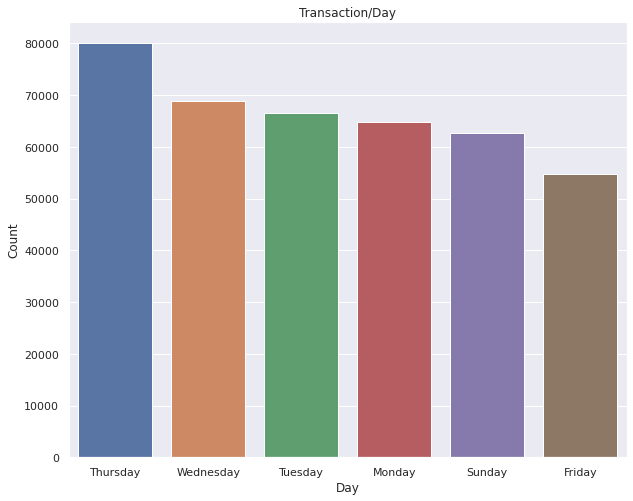

In [11]:
plt.figure(figsize=(10,8))
plt.title('Transaction/Day')
sns.barplot(x='Day',y='Count',data=day)

From the above graph we can easily conclude that on Thursday the transaction is high as compared to the other day, probabibly the customers are free on this day and there is less transaction for Friday.

# **Transaction Per Month**

In [12]:
month = data['month name'].value_counts().reset_index()
month.rename(columns = {'index' : 'Months'}, inplace = True)
month.rename(columns = {'month name' : 'Count'}, inplace = True)
month

,Months,Count
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


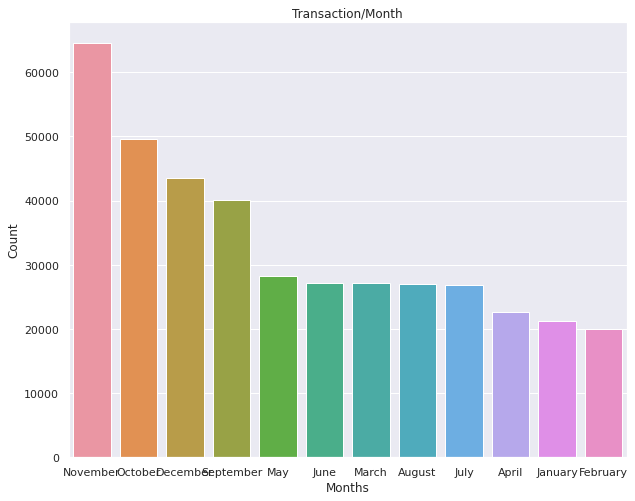

In [13]:
plt.figure(figsize=(10,8))
plt.title('Transaction/Month')
sns.barplot(x='Months',y='Count',data = month)

There is clear inclusion from the above graph that in the month of November i.e winter season and looking over it the customers are purchasing winter cloth and might be the diwali equipments also.
<br>In the month of January and February there is less purchasing of the customer and it is the end of the winter season so from this its clear that customer are having higher transaction in the season of winter.

In [14]:
Hour = data['Hour'].value_counts().reset_index()
Hour.rename(columns = {'index' : 'Hours'}, inplace = True)
Hour.rename(columns = {'Hour' : 'Count'}, inplace = True)
Hour 

,Hours,Count
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


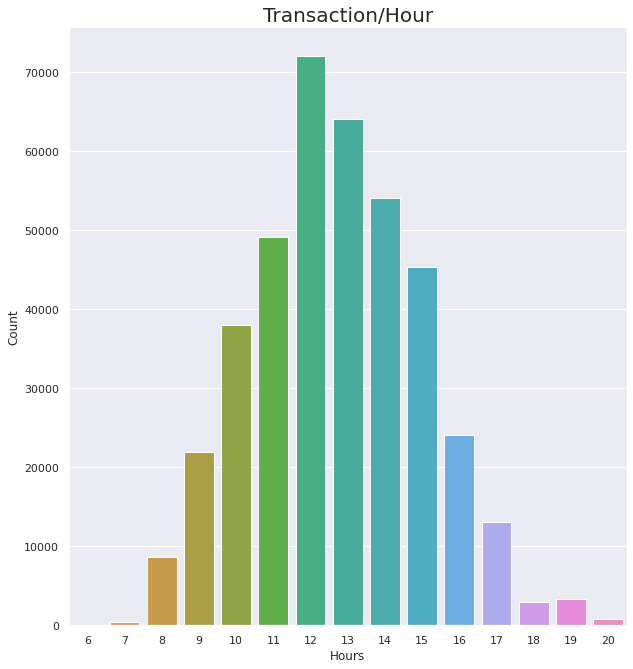

In [15]:
plt.figure(figsize=(10,11))
plt.title('Transaction/Hour',fontsize= 20)
sns.barplot(x='Hours',y='Count',data=Hour)

Hour states that the customers are high purchasing in between 11 to 4 pm so the almost customers are free in this time.